In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io.wavfile import write as wavwrite
from scipy.io.wavfile import read as wavread
from scipy.fft import fft,fftfreq,rfft,rfftfreq,irfft
import time
from time import sleep
from IPython.display import Audio
from scipy import signal
import cv2 as cv
from matplotlib.pylab import cm
import librosa
import librosa.display

%matplotlib nbagg



#default values 
duration = 1 #seconds
sample_rate = 44100 # samples per second
base = "D:/ENTC/PROJECTS/signal-processing/sp_files/"


#unique file name generator
def unique_file_name(additional_name=""):
    return str(time.time()) + ("_" + additional_name if additional_name else "") 

In [2]:
def get_spectrogram(filename,thresh_1 = 0.1,thresh_2 = 0.5,minTresh_2=0.8):

    samples,sr = librosa.load(filename)

    mel = librosa.feature.melspectrogram(samples,sr=sr,n_mels=500,n_fft = 2**11,hop_length=2**11//4)
    log_mel = np.log(mel)


    # plt.figure()
    # librosa.display.specshow(log_mel,x_axis="time",y_axis="mel",sr=sr)
    # plt.show()




    #get low frequencies to the bottom
    zb_log_mel = log_mel[::-1,:]

    #visualize the spectrum
    # fig,ax = plt.subplots(1)
    # ax.imshow(zb_log_mel,cmap="jet")
    # plt.show()

    #tresholding
    tr_zb_log_mel = zb_log_mel * np.float32(zb_log_mel > thresh_1 * zb_log_mel.max())

    #erode
    erosion_kernel = np.array([[1,1],
                              [1,1]])
    eroded_tr_zb_log_mel = cv.erode(tr_zb_log_mel,erosion_kernel)

    #visualizing
    #visualize the spectrum
    # fig,ax = plt.subplots(1)
    # ax.imshow(eroded_tr_zb_log_mel,cmap="jet")


    # plt.show()

    hor_kernel = np.array([[-1,-1,-2],
                          [4,3,1],
                          [-1,-1,-2]])

    #emphasizing horizontal lines
    hor_emph_eroded_tr_zb_log_mel = cv.filter2D(eroded_tr_zb_log_mel,-1,hor_kernel)
    hor_emph_eroded_tr_zb_log_mel=eroded_tr_zb_log_mel #r3ki3g - 
    #thresholding ------ weighted according to freq

    len_weights = hor_emph_eroded_tr_zb_log_mel.shape[0]
    ind_weights =np.linspace(0,1,len_weights)

    tre_weights = [(i+1/len_weights)**2 for i in ind_weights]
    tre_weights = [max((1/(1+x),minTresh_2)) for x in tre_weights]
    #making a column
    tre_weights = np.array([tre_weights]).T
    trb_hor_emph_eroded_tr_zb_log_mel =  np.float32((hor_emph_eroded_tr_zb_log_mel > thresh_2 *tre_weights *  hor_emph_eroded_tr_zb_log_mel.max()))

    # #dialate
    # dilation_kernel = np.array([[1,1,1],
    #                           [1,1,1],
    #                            [1,1,1]])
    # dil_trb_hor_emph_eroded_tr_zb_log_mel = cv.dilate(trb_hor_emph_eroded_tr_zb_log_mel,dilation_kernel)

    #visualize the spectrum
    # fig,ax2 = plt.subplots(1)
    # ax2.imshow(trb_hor_emph_eroded_tr_zb_log_mel,cmap="gray")


    # plt.show()

    return trb_hor_emph_eroded_tr_zb_log_mel

In [ ]:
filename = base + 'notes-17.wav'

thresh_1_set = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]
thresh_2_set = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]
thresh_3_set = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1]

for thresh_1 in thresh_1_set:
    for thresh_2 in thresh_2_set:
        for thresh_3 in thresh_3_set:
            spect = get_spectrogram(filename,thresh_1=thresh_1,thresh_2=thresh_2,minTresh_2=thresh_3)
            fig,ax=plt.subplots(1,figsize=(9,15))
            ax.imshow(spect)
            ax.set_title(f"thresh_1 = {thresh_1} & thresh_2 = {thresh_2} & minThresh_2 = {thresh_3}")
            plt.show()

C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12872/920074403.py:5: FutureWarning: Pass y=[ 2.4451435e-06 -2.9650678e-06  2.8681325e-06 ...  6.4530268e-06
 -3.5801525e-06  1.7065506e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.feature.melspectrogram(samples,sr=sr,n_mels=500,n_fft = 2**11,hop_length=2**11//4)


<IPython.core.display.Javascript object>


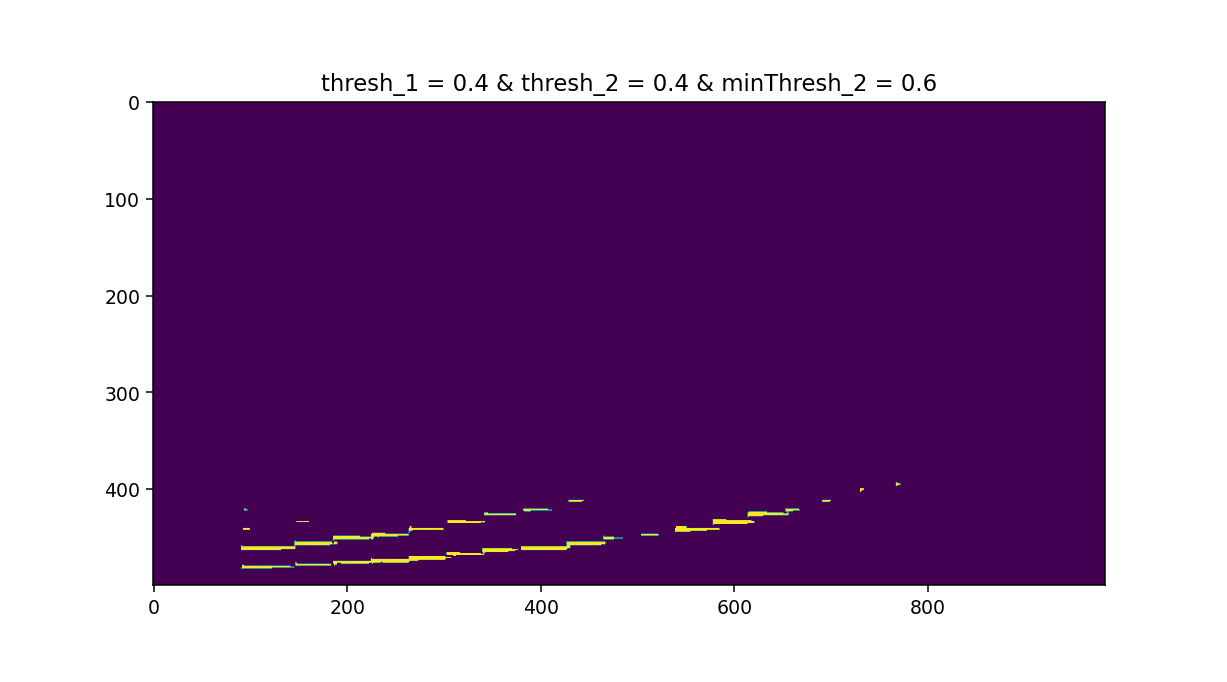

<IPython.core.display.Javascript object>


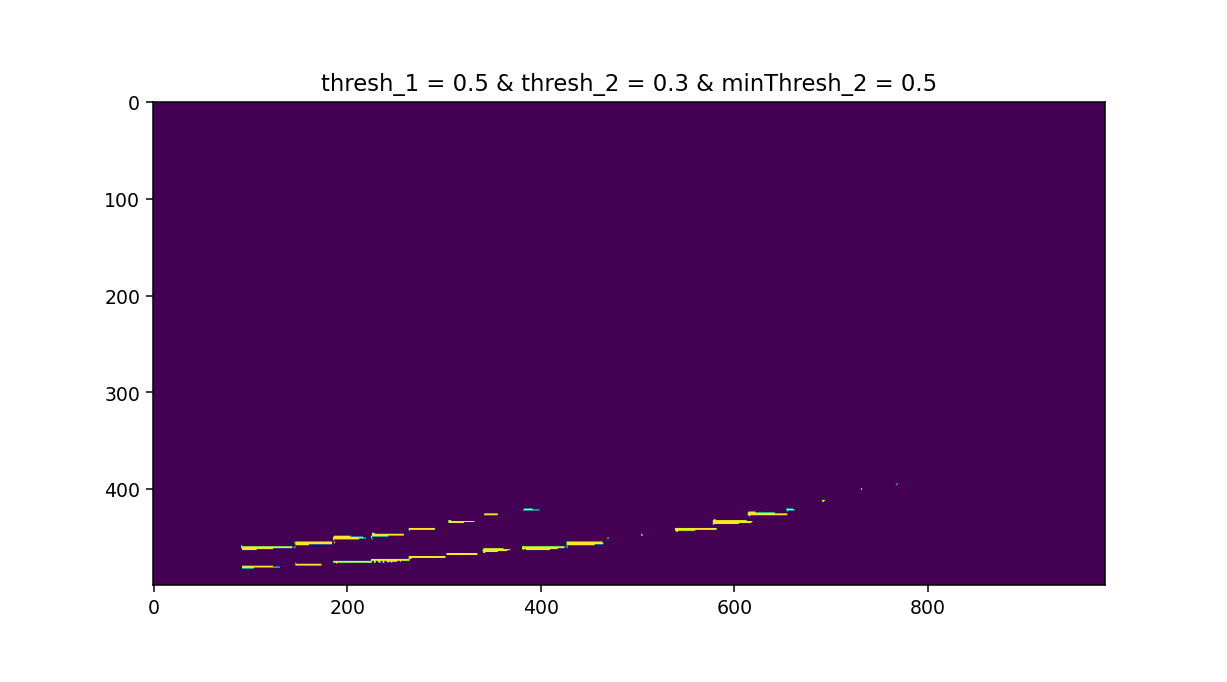

<IPython.core.display.Javascript object>


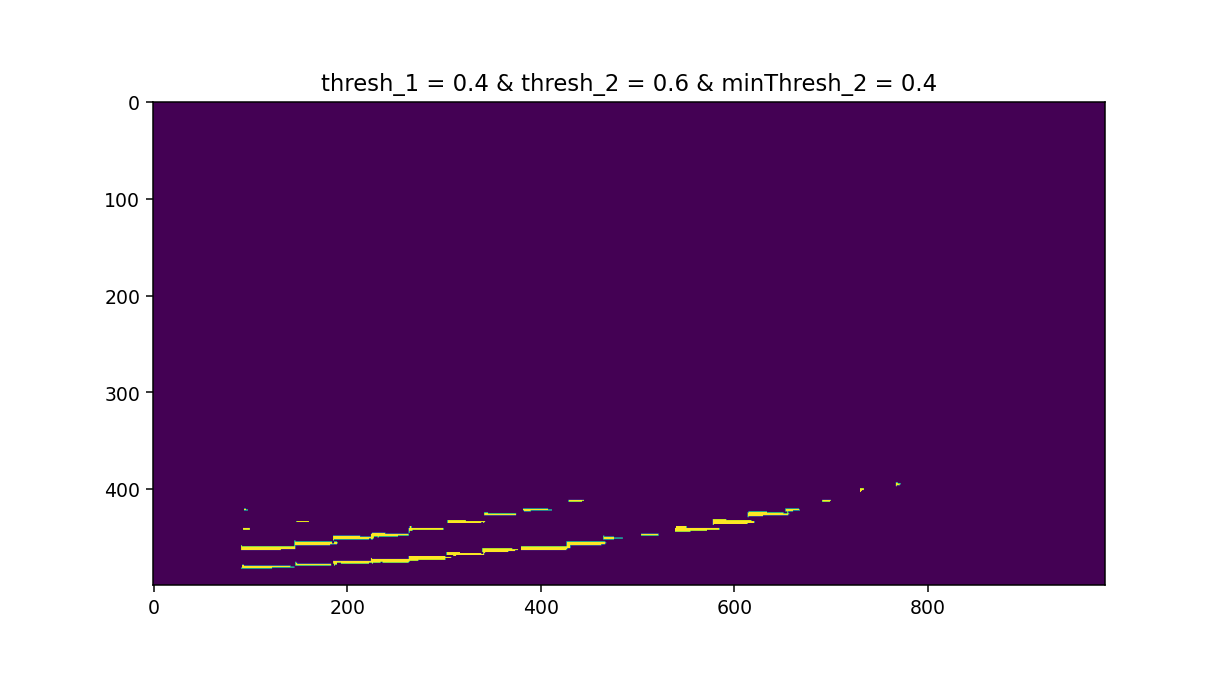

In [3]:
filename = base + 'notes-23.wav'
params = [  [0.4,0.4,0.6],
            [0.5,0.3,0.5],
            [0.4,0.6,0.4]   ]


for thresh_1,thresh_2,thresh_3 in params:
            spect = get_spectrogram(filename,thresh_1=thresh_1,thresh_2=thresh_2,minTresh_2=thresh_3)
            fig,ax=plt.subplots(1,figsize=(9,5))
            ax.imshow(spect)
            ax.set_title(f"thresh_1 = {thresh_1} & thresh_2 = {thresh_2} & minThresh_2 = {thresh_3}")
            plt.show()

C:\Users\R3KI3G\AppData\Local\Temp/ipykernel_12872/920074403.py:5: FutureWarning: Pass y=[ 2.4451435e-06 -2.9650678e-06  2.8681325e-06 ...  6.4530268e-06
 -3.5801525e-06  1.7065506e-06] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel = librosa.feature.melspectrogram(samples,sr=sr,n_mels=500,n_fft = 2**11,hop_length=2**11//4)


<IPython.core.display.Javascript object>


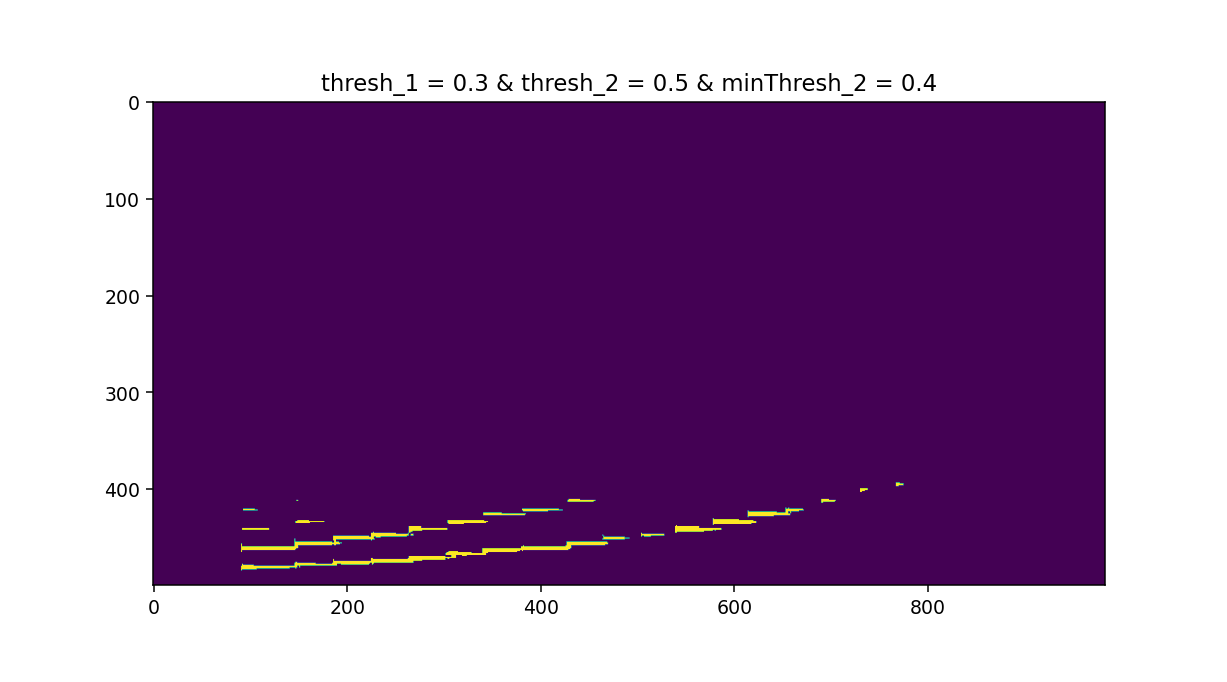

In [4]:
thresh_1,thresh_2,thresh_3 = [0.3,0.5,0.4]
spect = get_spectrogram(filename,thresh_1=thresh_1,thresh_2=thresh_2,minTresh_2=thresh_3)





fig,ax=plt.subplots(1,figsize=(9,5))
ax.imshow(spect)
ax.set_title(f"thresh_1 = {thresh_1} & thresh_2 = {thresh_2} & minThresh_2 = {thresh_3}")
plt.show()

In [5]:
clusters = []
for x in range(spect.shape[1]):
    nonZero = []
    for y in range(spect.shape[0]):
        
        if spect[y][x] >0:
            nonZero.append((y,x))
    if nonZero:
        print(nonZero)
        clusters.append(nonZero)

[(457, 91), (458, 91), (459, 91), (460, 91), (461, 91), (462, 91), (463, 91), (464, 91), (465, 91), (480, 91), (481, 91), (482, 91), (483, 91), (484, 91)]
[(441, 92), (442, 92), (460, 92), (461, 92), (462, 92), (463, 92), (478, 92), (479, 92), (480, 92), (481, 92), (482, 92), (483, 92)]
[(421, 93), (422, 93), (441, 93), (442, 93), (460, 93), (461, 93), (462, 93), (463, 93), (479, 93), (480, 93), (481, 93), (482, 93), (483, 93)]
[(421, 94), (422, 94), (441, 94), (442, 94), (460, 94), (461, 94), (462, 94), (463, 94), (479, 94), (480, 94), (481, 94), (482, 94), (483, 94)]
[(421, 95), (422, 95), (441, 95), (442, 95), (460, 95), (461, 95), (462, 95), (463, 95), (479, 95), (480, 95), (481, 95), (482, 95), (483, 95)]
[(421, 96), (422, 96), (441, 96), (442, 96), (460, 96), (461, 96), (462, 96), (463, 96), (479, 96), (480, 96), (481, 96), (482, 96), (483, 96)]
[(421, 97), (422, 97), (441, 97), (442, 97), (460, 97), (461, 97), (462, 97), (463, 97), (479, 97), (480, 97), (481, 97), (482, 97), (48

[(446, 244), (447, 244), (448, 244), (449, 244), (473, 244), (474, 244), (475, 244), (476, 244)]
[(446, 245), (447, 245), (448, 245), (449, 245), (473, 245), (474, 245), (475, 245), (476, 245)]
[(446, 246), (447, 246), (448, 246), (449, 246), (473, 246), (474, 246), (475, 246), (476, 246)]
[(446, 247), (447, 247), (448, 247), (449, 247), (473, 247), (474, 247), (475, 247), (476, 247)]
[(446, 248), (447, 248), (448, 248), (449, 248), (473, 248), (474, 248), (475, 248), (476, 248)]
[(446, 249), (447, 249), (448, 249), (449, 249), (473, 249), (474, 249), (475, 249), (476, 249)]
[(446, 250), (447, 250), (448, 250), (449, 250), (473, 250), (474, 250), (475, 250), (476, 250)]
[(447, 251), (448, 251), (449, 251), (473, 251), (474, 251), (475, 251), (476, 251)]
[(447, 252), (448, 252), (449, 252), (473, 252), (474, 252), (475, 252), (476, 252)]
[(447, 253), (448, 253), (449, 253), (473, 253), (474, 253), (475, 253), (476, 253)]
[(447, 254), (448, 254), (449, 254), (473, 254), (474, 254), (475,

[(421, 400), (422, 400), (423, 400), (460, 400), (461, 400), (462, 400), (463, 400)]
[(421, 401), (422, 401), (423, 401), (460, 401), (461, 401), (462, 401), (463, 401)]
[(421, 402), (422, 402), (423, 402), (460, 402), (461, 402), (462, 402), (463, 402)]
[(421, 403), (422, 403), (423, 403), (460, 403), (461, 403), (462, 403), (463, 403)]
[(421, 404), (422, 404), (423, 404), (460, 404), (461, 404), (462, 404), (463, 404)]
[(421, 405), (422, 405), (423, 405), (460, 405), (461, 405), (462, 405), (463, 405)]
[(421, 406), (422, 406), (423, 406), (460, 406), (461, 406), (462, 406), (463, 406)]
[(421, 407), (422, 407), (423, 407), (460, 407), (461, 407), (462, 407), (463, 407)]
[(421, 408), (422, 408), (460, 408), (461, 408), (462, 408), (463, 408)]
[(421, 409), (422, 409), (460, 409), (461, 409), (462, 409), (463, 409)]
[(421, 410), (422, 410), (460, 410), (461, 410), (462, 410), (463, 410)]
[(421, 411), (422, 411), (460, 411), (461, 411), (462, 411), (463, 411)]
[(421, 412), (422, 412), (46

[(433, 606), (434, 606), (435, 606), (436, 606)]
[(433, 607), (434, 607), (435, 607), (436, 607)]
[(433, 608), (434, 608), (435, 608), (436, 608)]
[(433, 609), (434, 609), (435, 609), (436, 609)]
[(433, 610), (434, 610), (435, 610), (436, 610)]
[(433, 611), (434, 611), (435, 611), (436, 611)]
[(433, 612), (434, 612), (435, 612), (436, 612)]
[(433, 613), (434, 613), (435, 613), (436, 613)]
[(423, 614), (424, 614), (425, 614), (426, 614), (427, 614), (428, 614), (429, 614), (433, 614), (434, 614), (435, 614), (436, 614)]
[(424, 615), (425, 615), (426, 615), (427, 615), (428, 615), (433, 615), (434, 615), (435, 615), (436, 615)]
[(424, 616), (425, 616), (426, 616), (427, 616), (428, 616), (433, 616), (434, 616), (435, 616), (436, 616)]
[(424, 617), (425, 617), (426, 617), (427, 617), (428, 617), (433, 617), (434, 617), (435, 617), (436, 617)]
[(424, 618), (425, 618), (426, 618), (427, 618), (428, 618), (433, 618), (434, 618), (435, 618)]
[(424, 619), (425, 619), (426, 619), (427, 619), (4

In [6]:
#summarizing
checkToRemove = {}

for cluster in clusters:
    firstBigDifference = -1
    for i in range(len(cluster)-1):
        if cluster[i][0]-cluster[i-1][0]>2:
            firstBigDifference = i
            break
    
    if firstBigDifference!=-1:
        LowerHarmonics = [x[0] for x in cluster[firstBigDifference:]]
        #found cluster:: seperation
        for i in range(firstBigDifference):
            
            if cluster[i] in checkToRemove:
                checkToRemove[cluster[i][0]].extend(LowerHarmonics)
            else:
                checkToRemove[cluster[i][0]] = set(LowerHarmonics)
        
    





print(checkToRemove)






{457: {475, 476, 477, 478, 479}, 458: {475, 476, 477, 478, 479}, 459: {480, 481, 477, 478, 479}, 460: {480, 481, 477, 478, 479}, 461: {480, 481, 477, 478, 479}, 462: {480, 481, 477, 478, 479}, 463: {480, 481, 477, 478, 479}, 464: {480, 481, 482, 483, 484}, 465: {480, 481, 482, 483, 484}, 441: {466, 467, 468, 471}, 442: {466, 467, 468, 471}, 421: {426, 427}, 422: {426, 427}, 452: {456, 457}, 453: {472, 473, 474, 475, 476}, 454: {475, 476, 477, 478, 479}, 455: {475, 476, 477, 478, 479}, 456: {475, 476, 477, 478, 479}, 434: {441, 442}, 435: {441, 442}, 412: {456, 457, 458, 455}, 433: {441, 442}, 449: {456, 457, 458, 455}, 450: {456, 457}, 451: {456, 457}, 446: {472, 473, 474, 475, 476}, 447: {472, 473, 474, 475, 476}, 448: {452, 455, 456, 457, 458}, 445: {470, 471, 472, 473, 474, 475, 476}, 439: {470, 471, 472, 473, 474}, 440: {470, 471, 472, 473, 474}, 443: {470, 471, 472, 473, 474}, 444: {448, 470, 471, 472, 473, 474, 475, 476, 447}, 436: {441, 442}, 425: {434, 435}, 426: {434, 435}, 42

In [7]:
# for x in range(spect.shape[1]):
#     for y in range(spect.shape[0]):
#         if y in checkToRemove:
#             foundComp = 0
#             for check in checkToRemove[y]:
#                 if spect[check,x] > 0:
#                     foundComp=1
#                     break
#             if foundComp:
#                 spect[y,x] = 0


changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed
changed


<IPython.core.display.Javascript object>


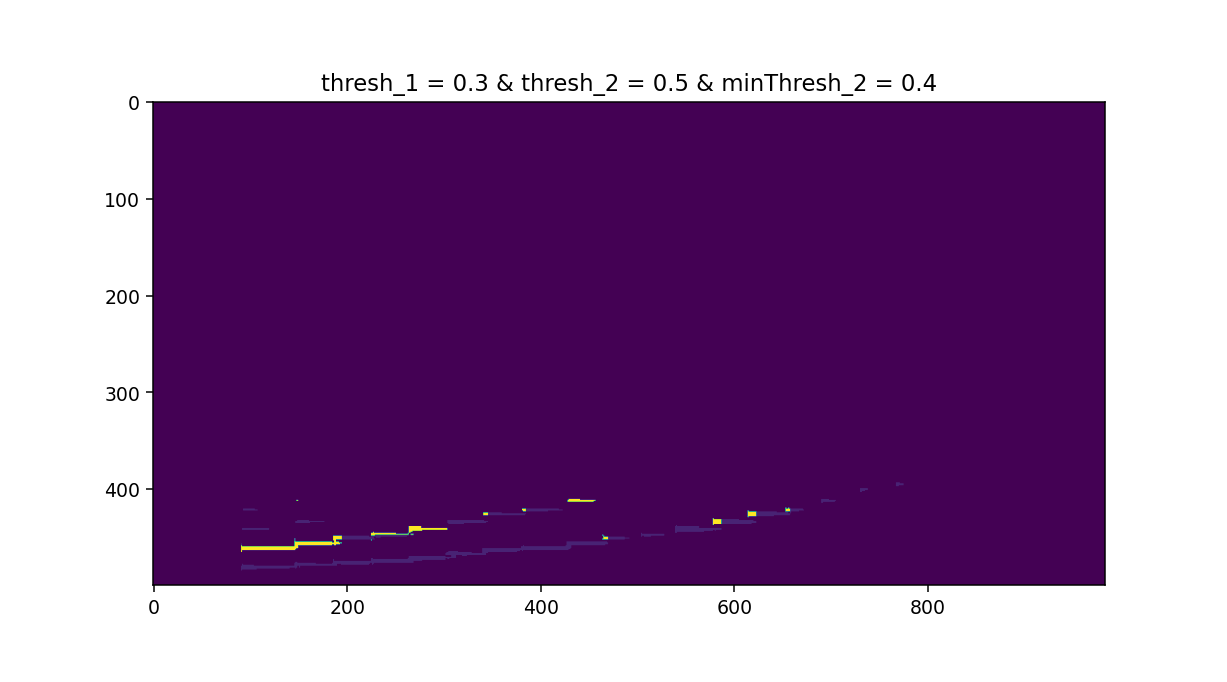

In [8]:
for x in range(spect.shape[1]):
    for key in checkToRemove:
        if spect[key, x]>0:
            for y in checkToRemove[key]:
                if spect[y, x]>0:
                    spect[key, x] = 10
                    print("changed")
                    break
    

       
    
fig,ax=plt.subplots(1,figsize=(9,5))
ax.imshow(spect)
ax.set_title(f"thresh_1 = {thresh_1} & thresh_2 = {thresh_2} & minThresh_2 = {thresh_3}")
plt.show()